# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [18]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 585 ms, sys: 6.07 ms, total: 591 ms
Wall time: 594 ms
Train ROC-AUC 0.9895
Valid ROC-AUC 0.9206
Test ROC-AUC 0.9137


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [19]:
results_train = {}
results_test = {}

depths = range(1, 30, 2)

for cur_depth in depths:
    boosting = Boosting(base_model_params = {'max_depth':cur_depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results_train[cur_depth] = boosting.score(x_train, y_train)
    results_test[cur_depth] = boosting.score(x_test, y_test)
    

In [20]:
best_depth = max(results_test, key=results_test.get)
print('Depth with the best ROC-AUC for test: ',best_depth)

Depth with the best ROC-AUC for test:  9


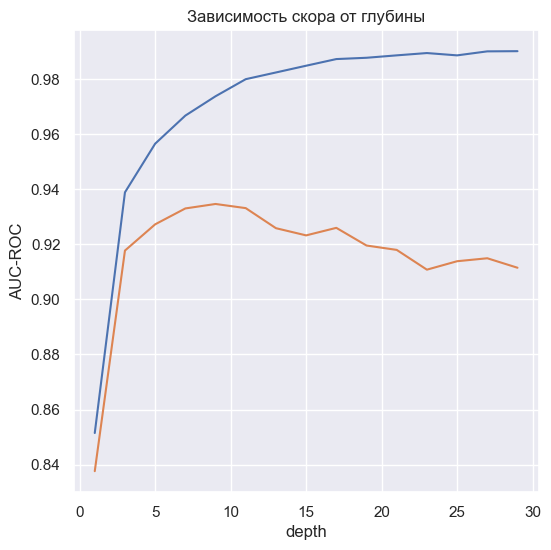

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax = sns.lineplot(results_train)
ax = sns.lineplot(results_test)
ax.set(xlabel ="depth", ylabel = "AUC-ROC", title ='Зависимость скора от глубины')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество имеет модель с глубиной 7-10, что согласуется с информацией с лекций, о том, что в бустинге стоит использовать неглубокие деревья, которые еще не успели переобучиться

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [10]:
import optuna
def objective(trial):
    params = {
        'max_depth' :  trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 4, 20),
        'min_samples_split' : trial.suggest_int("min_samples_split", 2, 20),
        'n_estimators' : trial.suggest_int('n_estimators', 100, 300, step=15),
        'learning_rate' : trial.suggest_float("learning_rate", 1e-4, 1e-1),
    }

    
    boosting = Boosting(base_model_params={
        'max_depth': params['max_depth'], 'min_samples_leaf': params['min_samples_leaf'], 'min_samples_split': params['min_samples_split']
    }, n_estimators=params['n_estimators'], learning_rate=params['learning_rate'])
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    score = boosting.score(x_valid, y_valid)
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
study.best_params

[I 2023-12-18 18:50:20,189] A new study created in memory with name: no-name-722ba4c4-5263-4e6d-a59f-2bf2d7fa4108
[I 2023-12-18 18:50:26,161] Trial 0 finished with value: 0.9375822635578724 and parameters: {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 220, 'learning_rate': 0.02680531952796518}. Best is trial 0 with value: 0.9375822635578724.
[I 2023-12-18 18:50:30,319] Trial 1 finished with value: 0.9393330954724213 and parameters: {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 115, 'learning_rate': 0.017847569809778353}. Best is trial 1 with value: 0.9393330954724213.
[I 2023-12-18 18:50:33,505] Trial 2 finished with value: 0.9335885149896275 and parameters: {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 19, 'n_estimators': 130, 'learning_rate': 0.06948338724815617}. Best is trial 1 with value: 0.9393330954724213.
[I 2023-12-18 18:50:38,176] Trial 3 finished with value: 0.9374254190303097 and paramet

{'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 17,
 'n_estimators': 205,
 'learning_rate': 0.08496044562163396}

In [11]:
best_params = study.best_params

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [23]:
# из 4 дз код
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        y_seg = y_test[(preds >= l) & (preds < r)]
        bin_real_ratios.append(y_seg.mean()) 
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], '--')
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid(True)
    plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

0.9397226993826394


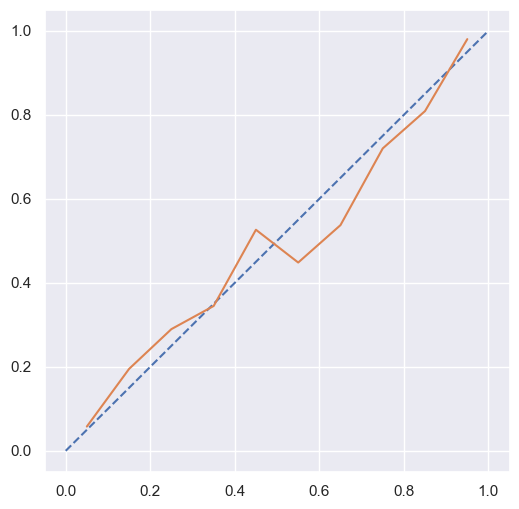

In [25]:
boosting = Boosting(base_model_params={'max_depth':best_params['max_depth'], 
                                           'min_samples_leaf':best_params['min_samples_leaf'], 
                                           'min_samples_split' : best_params['min_samples_split']}, n_estimators=best_params['n_estimators'], 
                                           learning_rate= best_params['learning_rate'])
boosting.fit(x_train, y_train, x_valid, y_valid)
print(boosting.score(x_test, y_test))
predicted_proba = boosting.predict_proba(x_test)[:, 1]

plot_calibration_curve(y_test_binary, predicted_proba)

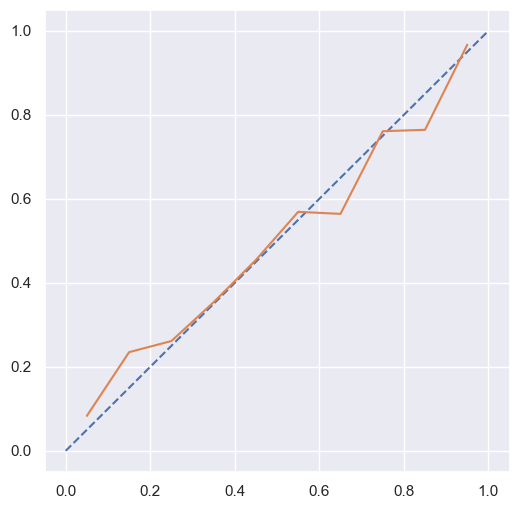

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)
predicted_proba_log = logistic_clf.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test_binary, predicted_proba_log)

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

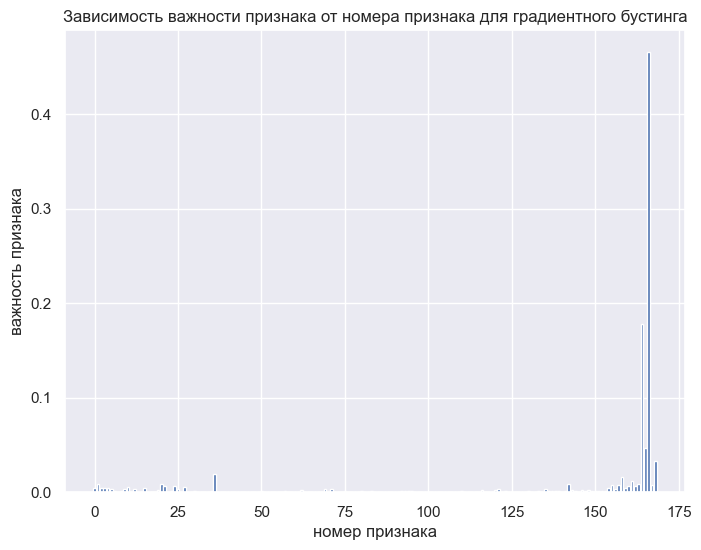

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = plt.bar(np.arange(len(boosting.feature_importances_)), boosting.feature_importances_)
plt.title('Зависимость важности признака от номера признака для градиентного бустинга')
plt.xlabel('номер признака')
plt.ylabel('важность признака')
plt.show()

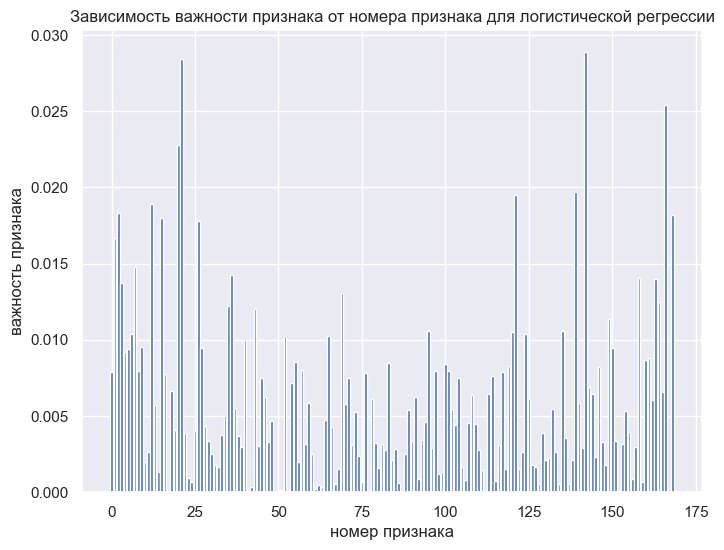

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax = plt.bar(np.arange(len(logistic_clf.coef_[0])), np.abs(logistic_clf.coef_[0]) / np.sum(np.abs(logistic_clf.coef_[0])))
plt.title('Зависимость важности признака от номера признака для логистической регрессии')
plt.xlabel('номер признака')
plt.ylabel('важность признака')
plt.show()

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [29]:
importances = boosting.feature_importances_

In [30]:
res = np.argsort(importances)[::-1]
best_features = res[:20]


In [31]:
best_model_boosting = Boosting(base_model_params={'max_depth':best_params['max_depth'], 
                                           'min_samples_leaf':best_params['min_samples_leaf'], 
                                           'min_samples_split' : best_params['min_samples_split']}, n_estimators=best_params['n_estimators'], 
                                           learning_rate= best_params['learning_rate'])
best_model_boosting.fit(x_train, y_train, x_valid, y_valid)
y_pred_proba = best_model_boosting.predict_proba(x_test)[:, 1]
best_model_boosting.score(x_test, y_test)


0.939384969525588

In [32]:
best_model_cut_boosting = Boosting(base_model_params={'max_depth':best_params['max_depth'], 
                                           'min_samples_leaf':best_params['min_samples_leaf'], 
                                           'min_samples_split' : best_params['min_samples_split']}, n_estimators=best_params['n_estimators'], 
                                           learning_rate= best_params['learning_rate'])
best_model_cut_boosting.fit(x_train[:, best_features], y_train, x_valid[:, best_features], y_valid)
best_model_cut_boosting.score(x_test[:, best_features], y_test)


0.937553040907037

Качество почти не изменилось, но при этом мы избавились от кучи признаков, что очень хорошо

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

In [34]:
best_model_boosting.fit(x_train, y_train, x_valid, y_valid)

logistic_clf.fit(x_train, y_train)


boosting_pred = best_model_boosting.predict_proba(x_valid)[:, 1]
log_reg_pred = logistic_clf.predict_proba(x_valid)[:, 1]

X_val_meta = np.column_stack((boosting_pred, log_reg_pred))

meta_model = LinearRegression()
meta_model.fit(X_val_meta, y_valid)

boosting_new_pred = best_model_boosting.predict_proba(x_test)[:, 1]
log_reg_new_pred = logistic_clf.predict_proba(x_test)[:, 1]

X_new_meta = np.column_stack((boosting_new_pred, log_reg_new_pred))

y_new_pred = meta_model.predict(X_new_meta)
roc_auc_score(y_test == 1, y_new_pred)


0.9402993593366955

ROC-AUC score стал немного лучше

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [126]:
from catboost import CatBoostClassifier

In [127]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostClassifier(**params, silent=True)
    model.fit(x_train, y_train)
    score = model.score(x_valid, y_valid)
    return score

In [128]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2023-12-12 20:43:54,167] A new study created in memory with name: no-name-1f734902-5c68-4d25-b196-d44a4e35e5dc


[I 2023-12-12 20:43:56,844] Trial 0 finished with value: 0.8840271877655055 and parameters: {'learning_rate': 0.07940757982586874, 'depth': 6, 'subsample': 0.2741220272890672, 'colsample_bylevel': 0.16519816800848547, 'min_data_in_leaf': 50}. Best is trial 0 with value: 0.8840271877655055.
[I 2023-12-12 20:44:05,663] Trial 1 finished with value: 0.8785046728971962 and parameters: {'learning_rate': 0.029133587675432365, 'depth': 10, 'subsample': 0.9130828968249837, 'colsample_bylevel': 0.9104850919786694, 'min_data_in_leaf': 18}. Best is trial 0 with value: 0.8840271877655055.
[I 2023-12-12 20:44:08,014] Trial 2 finished with value: 0.8738317757009346 and parameters: {'learning_rate': 0.0052846636382334845, 'depth': 5, 'subsample': 0.3243647600284589, 'colsample_bylevel': 0.5187819583233468, 'min_data_in_leaf': 100}. Best is trial 0 with value: 0.8840271877655055.
[I 2023-12-12 20:44:10,136] Trial 3 finished with value: 0.8525913338997451 and parameters: {'learning_rate': 0.002427386600

In [137]:
study.best_params

{'learning_rate': 0.0604876904173706,
 'depth': 3,
 'subsample': 0.3875955164202928,
 'colsample_bylevel': 0.7767199092853629,
 'min_data_in_leaf': 84}

In [138]:
model = CatBoostClassifier(iterations=100,
                           learning_rate=study.best_params['learning_rate'],
                           depth=study.best_params['depth'], 
                           subsample=study.best_params['subsample'],
                           colsample_bylevel = study.best_params['colsample_bylevel'],
                            min_data_in_leaf=study.best_params['min_data_in_leaf'] )


model.fit(x_train, y_train)
preds_class = model.predict(x_test)
preds_proba = model.predict_proba(x_test)
score = model.score(x_test, y_test)
score


0:	learn: 0.6384275	total: 3.43ms	remaining: 340ms
1:	learn: 0.5912836	total: 6.43ms	remaining: 315ms
2:	learn: 0.5461856	total: 10ms	remaining: 325ms
3:	learn: 0.5179722	total: 13.1ms	remaining: 313ms
4:	learn: 0.4876235	total: 15.8ms	remaining: 300ms
5:	learn: 0.4630266	total: 17.9ms	remaining: 281ms
6:	learn: 0.4437366	total: 20.5ms	remaining: 272ms
7:	learn: 0.4263227	total: 22.3ms	remaining: 257ms
8:	learn: 0.4130339	total: 24.3ms	remaining: 246ms
9:	learn: 0.4053201	total: 25.8ms	remaining: 232ms
10:	learn: 0.3942571	total: 27.4ms	remaining: 221ms
11:	learn: 0.3837384	total: 29ms	remaining: 212ms
12:	learn: 0.3751424	total: 30.5ms	remaining: 204ms
13:	learn: 0.3674727	total: 32.2ms	remaining: 198ms
14:	learn: 0.3603108	total: 33.9ms	remaining: 192ms
15:	learn: 0.3542171	total: 36ms	remaining: 189ms
16:	learn: 0.3464087	total: 37.5ms	remaining: 183ms
17:	learn: 0.3420672	total: 39.3ms	remaining: 179ms
18:	learn: 0.3372745	total: 41.3ms	remaining: 176ms
19:	learn: 0.3335555	total: 

0.8614534636634085

Catboost отработал немного хуже, чем градиентный бустинг

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

<img src="IMG_3584.JPG">

хочется уже отдохнуть по-человечески(((